## 3. 파인튜닝

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./diabetes.csv", index_col=None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
X = X.astype('float32')

In [7]:
# SVM으로 예측하기 때문에 y를 원 핫 인코딩하지 않음.
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [8]:
from sklearn.preprocessing import MinMaxScaler
# 2차원 상태에서 정규화를 진행
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(768, 8, 1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [10]:
# CNN 모델을 로드
import joblib
from tensorflow.keras.models import load_model

fine_tuning_model = load_model('./models/transfer_learning_cnn.h5')

In [11]:
from tensorflow.keras.metrics import AUC
# Hinge loss를 사용하여 컴파일
fine_tuning_model.compile(optimizer='adam', loss='hinge', metrics=['accuracy', AUC(name='auc')])

In [12]:
model_history=fine_tuning_model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = fine_tuning_model.predict(X_test)

# 확률을 0.5 기준으로 0 또는 1로 변환 (이진 분류일 경우)
y_pred_class = (y_pred >= 0.5).astype(int)  # 0.5 이상이면 1, 아니면 0

# y_test를 numpy 배열로 변환하여 1차원 배열로 처리
y_test_class = y_test.to_numpy()  # 또는 y_test.values로도 변환 가능

Epoch 1/30


2024-10-02 16:45:56.311396: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


18/18 [==============================] - 1s 11ms/step - loss: 0.5237 - accuracy: 0.7587 - auc: 0.7299 - val_loss: 0.4558 - val_accuracy: 0.7917 - val_auc: 0.7506
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.7656 - auc: 0.7380 - val_loss: 0.4566 - val_accuracy: 0.7812 - val_auc: 0.7445
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.7569 - auc: 0.7363 - val_loss: 0.4537 - val_accuracy: 0.7865 - val_auc: 0.7449
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7674 - auc: 0.7469 - val_loss: 0.4524 - val_accuracy: 0.7760 - val_auc: 0.7447
Epoch 5/30
18/18 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7587 - auc: 0.7400 - val_loss: 0.4484 - val_accuracy: 0.7917 - val_auc: 0.7529
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7656 - auc: 0.7543 - val_loss: 0.4517 - val_accuracy: 0.7

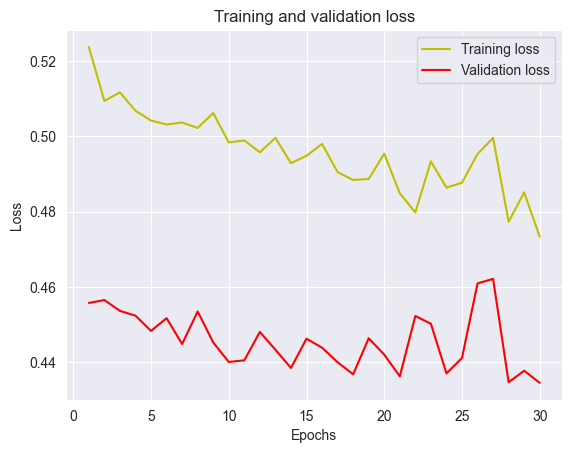

In [13]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

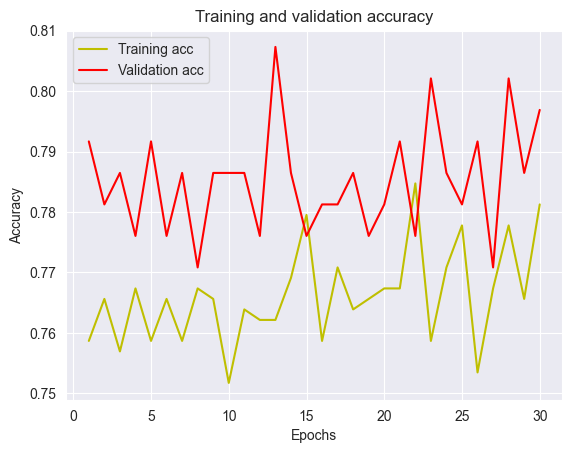

In [14]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

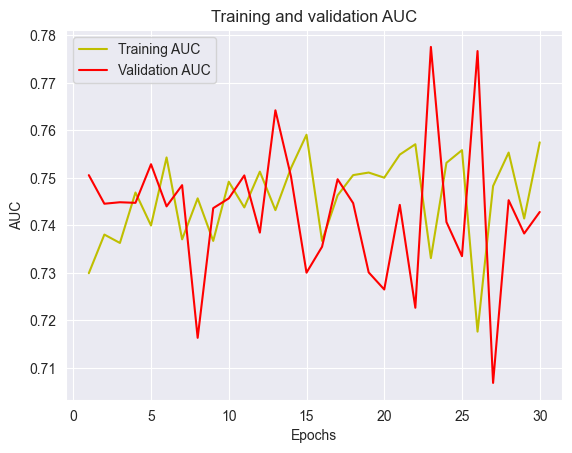

In [15]:
# 모델 학습 후의 history에서 'auc'와 'val_auc'를 추출
auc = model_history.history['auc']
val_auc = model_history.history['val_auc']

epochs = range(1, len(auc) + 1)

# AUC를 시각화
plt.plot(epochs, auc, 'y', label='Training AUC')
plt.plot(epochs, val_auc, 'r', label='Validation AUC')
plt.title('Training and validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [16]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       130
           1       0.78      0.52      0.62        62

    accuracy                           0.80       192
   macro avg       0.79      0.72      0.74       192
weighted avg       0.79      0.80      0.78       192

[[121   9]
 [ 30  32]]
